> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from IPython.core.display import HTML
sns.set()
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 5)
HTML('<style> code {background-color:#E8E8E8 !important;} </style>')

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
fpath = 'data/noshowappointments-kagglev2-may-2016.csv'
fpath = 'data/KaggleV2-May-2016.csv'
df = pd.read_csv(fpath)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Overview on Kaggle
### Context
A person makes a doctor appointment, receives all the instructions and no-show. Who to blame? If this is help, don´t forget to upvote :) Greatings!

### Content
300k medical appointments and its 15 variables (characteristics) of each. The most important one if the patient show-up or no-show the appointment. Variable names are self-explanatory, if you have doubts, just let me know!

scholarship variable means this concept = https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia

### Data Dictionary
- `PatientId` = Identification of a patient
- `AppointmentID` = Identification of each appointment
- `Gender` = Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
- `DataAgendamento(ScheduleDay)` = The day someone called or registered the appointment, this is before appointment of course.
- `DataMarcacaoConsulta(AppointmentDay)` = The day of the actuall appointment, when they have to visit the doctor.
- `Age` = How old is the patient.
- `Neighbourhood` = Where the appointment takes place.
- `Scholarship` = Ture of False . Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia
- `Hipertension` = True or False
- `Diabetes` = True or False
- `Alcoholism` = True or False
- `Handcap` = True or False
- `SMS_received` = 1 or more messages sent to the patient.
- `No-show` = True or False.

*Nighbourhood means the place where the hospital is located and not where the patient lives

### Inspiration
What if that possible to predict someone to no-show an appointment?

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
df.duplicated().sum()

0

- No null values and dups
- Why is PatientId float?
- Age has outliers. What does '-1' mean? Does '0' mean babies?
- ScheduleDay and AppointmentDay are string. I'll convert them to datetime
- No-show is very confusing to me.

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

### Convert PatientId to int 

In [6]:
# Maybe I don't have to do this
df['PatientId'] = df['PatientId'].astype(int)

### Clean Age column

In [7]:
print(np.sort(df['Age'].unique()))

[ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 102 115]


In [8]:
df = df[df['Age'] >= 0]

### Reverse No-show column

In [9]:
df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

- Only two unique values. Nice.

In [10]:
# Reverse No-show column
df['Show'] = df['No-show'].apply(lambda x: 'Yes' if x == 'No' else 'No')
df.drop('No-show', axis=1, inplace=True)

### Covert SchaduleDay and AppointmentDay to datetime 

In [11]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

### Check the cleaned dataset

In [12]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,Yes
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110526 non-null int64
AppointmentID     110526 non-null int64
Gender            110526 non-null object
ScheduledDay      110526 non-null datetime64[ns]
AppointmentDay    110526 non-null datetime64[ns]
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
Hipertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handcap           110526 non-null int64
SMS_received      110526 non-null int64
Show              110526 non-null object
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 12.6+ MB


In [14]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921700e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

In [15]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,Yes
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes


In [16]:
# Add new columns
df.insert(df.columns.get_loc('ScheduledDay') + 1, 'ScheduledWeekDay', df['ScheduledDay'].apply(lambda x: x.weekday()))
df.insert(df.columns.get_loc('AppointmentDay') + 1, 'AppointmentWeekDay', df['AppointmentDay'].apply(lambda x: x.weekday()))
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,ScheduledWeekDay,AppointmentDay,AppointmentWeekDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show
0,29872499824296,5642903,F,2016-04-29 18:38:08,4,2016-04-29,4,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,558997776694438,5642503,M,2016-04-29 16:08:27,4,2016-04-29,4,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes
2,4262962299951,5642549,F,2016-04-29 16:19:04,4,2016-04-29,4,62,MATA DA PRAIA,0,0,0,0,0,0,Yes
3,867951213174,5642828,F,2016-04-29 17:29:31,4,2016-04-29,4,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes
4,8841186448183,5642494,F,2016-04-29 16:07:23,4,2016-04-29,4,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes


In [17]:
def bar_compare(series, labels, colors, xlabel='x', ylabel='y', title=None, ticklabels=None, fs=16, width=0.35):
    num_series = len(series)
    idx = np.arange(len(series[0]))
    for i, ser in enumerate(series):
        bar = plt.bar(idx + i*width, ser, width, color=colors[i], alpha=0.7, label=labels[i])
    locations = idx + width / 2 * (num_series - 1)
    ticklabels = [str(x) for x in idx] if ticklabels is None else ticklabels
    title = '' if title is None else title
    plt.xticks(locations, ticklabels, fontsize=fs)
    plt.yticks(fontsize=fs)
    plt.title(title, fontsize=fs)
    plt.xlabel(xlabel, fontsize=fs)
    plt.ylabel(ylabel, fontsize=fs)
    plt.legend(fontsize=fs, bbox_to_anchor=(1, 0.5))
    plt.show()

In [18]:
df_no = df[df['Show'] == 'No']
df_yes = df[df['Show'] == 'Yes']
print('No-show:', df_no.size)
print('Show:', df_yes.size)
print('Show-up rate:', df_yes.size / df.size)

No-show: 357104
Show: 1411312
Show-up rate: 0.798065613521


## Day of week

In [19]:
wd_no = df[df['Show'] == 'No'].groupby('ScheduledWeekDay').size()
wd_yes = df[df['Show'] == 'Yes'].groupby('ScheduledWeekDay').size()
wd_total = df.groupby('ScheduledWeekDay').size()
wd_total

ScheduledWeekDay
0    23084
1    26168
2    24262
3    18073
4    18915
5       24
dtype: int64

 The number of appointment made in Saturday is very small. I think Saturday and Sunday are day-off for hospitals in Brazil

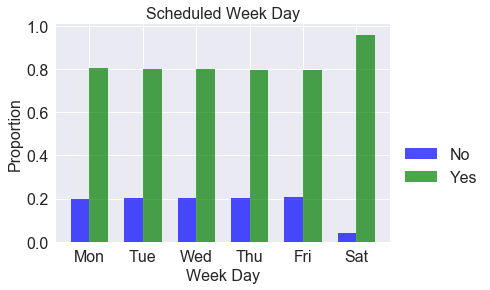

In [20]:
import calendar

bar_compare(
    [wd_no / wd_total, wd_yes / wd_total],
    ['No', 'Yes'],
    ['b', 'g'],
    'Week Day', 'Proportion', 'Scheduled Week Day',
    calendar.weekheader(3).split()
)

In [21]:
wd_no = df[df['Show'] == 'No'].groupby('AppointmentWeekDay').size()
wd_yes = df[df['Show'] == 'Yes'].groupby('AppointmentWeekDay').size()
wd_total = df.groupby('AppointmentWeekDay').size()

wd_no_prop = wd_no / wd_total
wd_yes_prop = wd_yes / wd_total

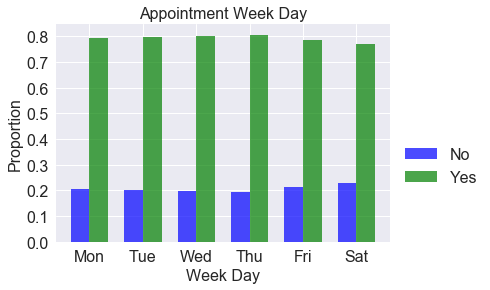

In [22]:
bar_compare(
    [wd_no_prop, wd_yes_prop],
    ['No', 'Yes'],
    ['b', 'g'],
    'Week Day', 'Proportion', 'Appointment Week Day',
    calendar.weekheader(3).split()
)

We don't see any pattern...

## ScheduledDay

In [23]:
min_date = min(df['ScheduledDay'])
max_date = max(df['ScheduledDay'])
print(min_date, max_date)

2015-11-10 07:13:56 2016-06-08 20:07:23


In [24]:
by = [df['ScheduledDay'].dt.year, df['ScheduledDay'].dt.month]
df_sch = df.groupby(by)
df_sch.size()

ScheduledDay  ScheduledDay
2015          11                  1
              12                 61
2016          1                  60
              2                 281
              3                3614
              4               25339
              5               67421
              6               13749
dtype: int64

- `SchduledDay` has a weird disribution. The number of data in Apr, May, and Jun is much large than the rest.

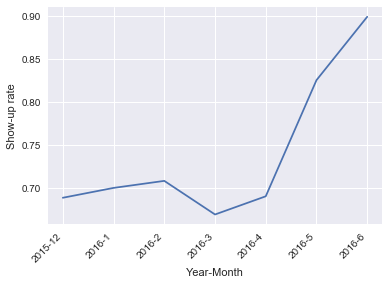

In [25]:
sch_no = df_no.groupby(by).size().values
# day_no = np.pad(day_no, (1, 0), 'constant', constant_values=0)
sch_yes = df_yes.groupby(by).size().values[1:]  # Ignore 2015-11
sch_total = sch_no + sch_yes

# create ticklabelsa
levels = df_no.groupby(by).size().index.levels
labels = df_no.groupby(by).size().index.labels
xticklabels = []

for year_idx, month_idx in zip(*labels):
    year = levels[0][year_idx]
    month = levels[1][month_idx]
    xticklabels.append('{}-{}'.format(year, month))

# plot the results
idx = np.arange(len(sch_no))
plt.plot(idx, sch_yes / sch_total)
# plt.plot(idx, day_yes / day_total, label='Yes')
plt.xlabel('Year-Month')
plt.ylabel('Show-up rate')
plt.xticks(idx, xticklabels, rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

Show-up rate starts increasing on 2016-4

## AppointmentDay

In [26]:
min_date = min(df['AppointmentDay'])
max_date = max(df['AppointmentDay'])
print(min_date, max_date)

2016-04-29 00:00:00 2016-06-08 00:00:00


- `AppointmentDay` spans over about 1 month while `ScheduledDay` spans over about 7 month.
- Now it makes sense that `ScheduledDay` has a weird distribution. This in

In [27]:
by = [df['AppointmentDay'].dt.year, df['AppointmentDay'].dt.month]
df_app = df.groupby(by)
df_app.size()

AppointmentDay  AppointmentDay
2016            4                  3235
                5                 80841
                6                 26450
dtype: int64

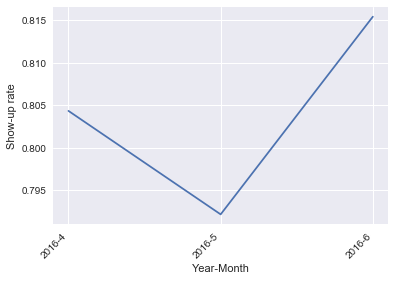

In [28]:
app_no = df_no.groupby(by).size().values
# day_no = np.pad(day_no, (1, 0), 'constant', constant_values=0)
app_yes = df_yes.groupby(by).size().values
app_total = app_no + app_yes

# create ticklabelsa
levels = df_no.groupby(by).size().index.levels
labels = df_no.groupby(by).size().index.labels
xticklabels = []

for year_idx, month_idx in zip(*labels):
    year = levels[0][year_idx]
    month = levels[1][month_idx]
    xticklabels.append('{}-{}'.format(year, month))

# plot the results
idx = np.arange(len(app_no))
plt.plot(idx, app_yes / app_total)
# plt.plot(idx, day_yes / day_total, label='Yes')
plt.xlabel('Year-Month')
plt.ylabel('Show-up rate')
plt.xticks(idx, xticklabels, rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

## Age

In [29]:
df_no['Age10'] = df_no['Age'].apply(lambda x: x//10)
df_yes['Age10'] = df_yes['Age'].apply(lambda x: x//10)
age_no = df_no.groupby('Age10').size().values
age_no = np.insert(age_no, -1, 0)
age_yes = df_yes.groupby('Age10').size().values
age_total = age_no + age_yes
print(age_total)

[17475 12936 13699 15171 14209 15863 11876  5934  2946   406     6     5]


- The number of patient older than 100 is very low. I'll cut them.

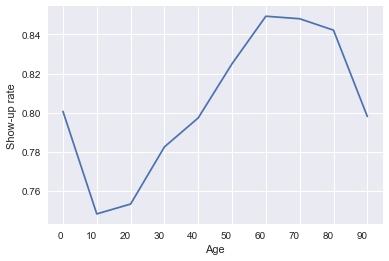

In [30]:
# plot the results
xticklabels = [str(10 * x) for x in range(12)]
idx = np.arange(len(age_no) - 2)
plt.plot(idx, (age_yes / age_total)[:-2])
plt.xlabel('Age')
plt.ylabel('Show-up rate')
plt.xticks(idx, xticklabels, rotation=0, ha='right')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

- Older people seem to have the high show-up rate.
- Younger people seem to have the low show-up rate.

## Gender

In [31]:
gen_no = df_no.groupby('Gender').size()
gen_yes = df_yes.groupby('Gender').size()
gen_total = df.groupby('Gender').size()
gen_rate = gen_yes / gen_total
print(age_total)

age_rate.plot('bar', fontsize=14, rot=0)
plt.ylabel('Show-up rate', fontsize=14)
plt.title('False')
plt.show()

[17475 12936 13699 15171 14209 15863 11876  5934  2946   406     6     5]


NameError: name 'age_rate' is not defined

- No difference...

### Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received

In [ ]:
cols = ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']
true_no = df_no[cols].sum()
true_yes = df_yes[cols].sum()
false_no = df_no[cols].count() - df_no[cols].sum()
false_yes = df_yes[cols].count() - df_yes[cols].sum()
true_total = true_no + true_yes
false_total = false_no + false_yes
true_rate = true_yes / true_total
false_rate = false_yes / false_total

false_rate.plot('bar', fontsize=14)
plt.ylabel('Show-up rate', fontsize=14)
plt.title('False')
plt.show()

true_rate.plot('bar', fontsize=14, color='g')
plt.ylabel('Show-up rate', fontsize=14)
plt.title('True')
plt.show()
print(false_total)
print(true_total)

- SMS remiders decrese the show-up rate. People usually tend to come to the hospital more foten when they receive SMS reminders.

## Neighbourhood

In [ ]:
# for city in df['Neighbourhood'].unique(): print(city)

In [ ]:
nh_no = df_no.groupby('Neighbourhood').size()
nh_yes = df_yes.groupby('Neighbourhood').size()
nh_total = df.groupby('Neighbourhood').size()
nh_rate = nh_yes / nh_rate

nh_total.sort_values().plot('bar', figsize=(16, 10))
plt.ylabel('Number of appointment')
plt.show()

nh_rate.sort_values().plot('bar', figsize=(16, 10))
plt.ylabel('Show-up rate')
plt.show()

### Research Question 1
What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

- Age: Older people have high show-up rate.
- Scheduled Day: The show-up rate start increasing at 2016-4.
- SMS reminders: People who received the reminder are less likely to show up. This is strange.


## Age

In [ ]:
xticklabels = [str(10 * x) for x in range(12)]
idx = np.arange(len(age_no) - 2)
plt.plot(idx, (age_yes / age_total)[:-2])
plt.xlabel('Age')
plt.ylabel('Show-up rate')
plt.xticks(idx, xticklabels, rotation=0, ha='right')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

## Month

In [ ]:
# create ticklabelsa
levels = df_no.groupby(by).size().index.levels
labels = df_no.groupby(by).size().index.labels
xticklabels = []

for year_idx, month_idx in zip(*labels):
    year = levels[0][year_idx]
    month = levels[1][month_idx]
    xticklabels.append('{}-{}'.format(year, month))

idx = np.arange(len(day_no))
plt.plot(idx, day_yes / day_total)
plt.xlabel('Year-Month')
plt.ylabel('Show-up rate')
plt.xticks(idx, xticklabels, rotation=45, ha='right')
plt.show()

## SMS reminder

In [ ]:
cols = ['SMS_received']
true_no = df_no[cols].sum()
true_yes = df_yes[cols].sum()
false_no = df_no[cols].count() - df_no[cols].sum()
false_yes = df_yes[cols].count() - df_yes[cols].sum()
true_total = true_no + true_yes
false_total = false_no + false_yes
true_rate = true_yes / true_total
false_rate = false_yes / false_total
sms_rate = pd.concat([false_rate, true_rate], axis=1)
sms_rate.columns = ['No', 'Yes']

sms_rate.plot(kind='bar', fontsize=14, rot=0)
plt.ylabel('Show-up rate', fontsize=14)
plt.show()

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])